## Distributions

SciPy is a Python library that's particularly useful for simulating distributions and analyzing data beyond computing means and standard deviations. Some things you can do in SciPy include:
* clustering
* minimizing or maximizing a given function
* running graph algorithms
* and more

Today, we'll be focusing on a particular subpackage of SciPy, the `scipy.stats` subpackage. 

(Run the following line if you do not have scipy installed)

In [ ]:
!pip install scipy

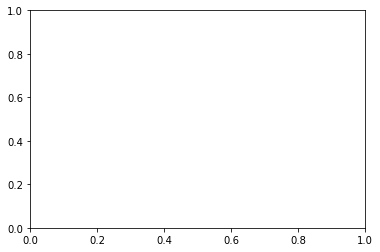

In [11]:
from scipy import stats 

import matplotlib.pyplot as plt
import numpy as np

# this import takes a few seconds
# import scipy.stats also works, you'll just need the extra "scipy." in front of any calls to stat.

Besides the normal distribution, there are a handful of other distributions that are commonly used to help describe some standard biological data or environment; we'll propose some here!

### Normal distribution

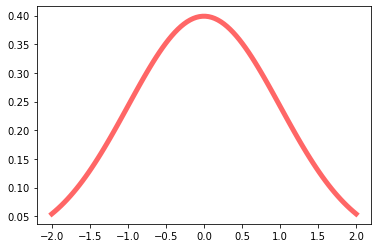

In [33]:
fig, ax = plt.subplots(1, 1);
x = np.linspace(-2, 2, 100) 
# linspace is a handy, non-integer alternative to range. np.arange has similar functionality.

ax.plot(x, stats.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.show()

### Binomial distribution [discrete]

Typically useful for simulating a series of *independent* "Bernoulli" trials, which are defined by having two/binary outcomes (a success or failure). These distributions are characterized by the number of trials that are run and the probability of a single trial succeeding.

example: GC content across different sequences.

According to standard practice, silencing RNA or siRNA should be between 21 and 23 base pairs long and should ideally have a GC fraction of approximately 45%-55%. If we are making a siRNA that is 22 bases long, what is the probability that a sequence randomly chosen from the genome will have exactly 11 (50%) G/C bases?

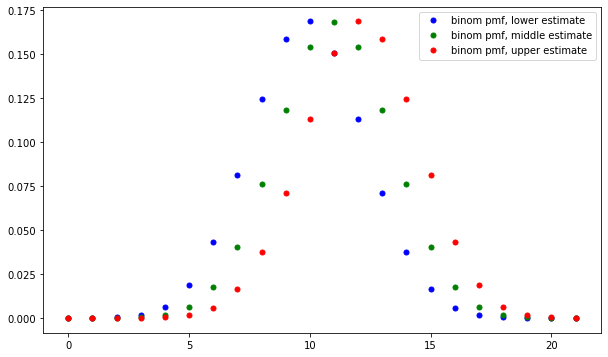

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6));

x = range(0, 22)
lower = ...
upper = ...
mid = ...
ax.plot(x, lower, 'bo', ms=5, label='binom pmf, lower estimate')
ax.plot(x, mid, 'go', ms=5, label='binom pmf, middle estimate')
ax.plot(x, upper, 'ro', ms=5, label='binom pmf, upper estimate')
plt.legend()

plt.show()

In [61]:
# actual probability - even though this value is fairly low, it's relatively high to the rest of the 
# achievable values for this set of trials/sequence length.

## add relevant parameters inside parentheses for the lower, mid, and upper estimates
stats.binom.pmf(), stats.binom.pmf(), stats.binom.pmf(), 

(0.15058523544746275, 0.16818809509277374, 0.15058523544746302)

There's also the multinomial distribution, which does not require binary outcomes for each of its trials (can have 3+ outcomes; e.g. party affliation (Republican, Democrat, and Independent)). 

For example, with three options and three set of probabilities of each of these occurring (option a occurs with probability $x$, b with $y$, and c with $z$, such that $x + y + z = 1$), then for $N = a_1 + b_1 + c_1$:
$$P(a = a_1, b = b_1, c= c_1) = \frac{N!}{a_1! b_1! c_1!} (x)^{a_1} (y)^{b_1} (z)^{c_1}$$
For the binomial case (two options, a and b), and probabilities $x$ and $y = 1 - x$, this probability simplifies to:
$$P(a = a_1, b = b_1) =  \frac{N!}{a_1! b_1!} (x)^{a_1} (y)^{b_1} = {N \choose a} (x)^{a_1} (1-x)^{N-a_1}$$



### Poisson distribution [discrete]

This is another discrete distribution, but one that focuses on modeling the probability of seeing x events *within a certain time interval* (or a similar constraint, like volume or sample size). This can be the number of shoppers who go through checkout in an hour, the number of bus arrivals in a 10 minute period, or number of positive cells in a sample, assuming the positive rate is extremely low.

These distributions are characterized by only the average (non-negative) number of observations of the event in question over a defined time interval, $\mu$, as follows:
$$P(X = k \text{ times}) = e^{-\mu} \frac{\mu ^ k}{k!}$$

**EXAMPLE:** In a particular stage of development, neural precursor stem cells are observed to differentiate at a rate of 10 per day per 10,000 cells. Given a population of 20,000 undifferentiated cells, what is the probability of seeing one cell differentiate in 1 hour?

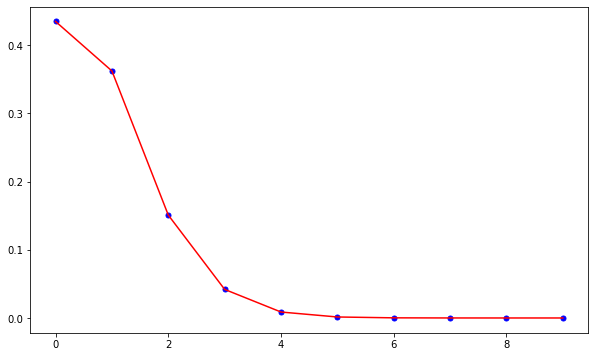

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6));

x = range(10)
# use scipy.poisson.pmf() with x to plot the distribution


plt.show()

In [70]:
# actual probability:
stats.poisson.pmf(1, 0.833) 

0.3621410012367658

Other distributions to check out:
* Hypergeometric (tracking 'successes' in 'trials', but without replacement)
* Exponential distribution (sort of the continuous version of Poisson, but expresses the time between two events occurring, or one event ending, etc)
* Dirichlet (continuous version of multinomial distribution)

### Sidebar: normalizing data

Some dimensionality reduction methods, including PCA, require that the data you are attempting to "summarize" be centered, and sometimes even normalized (assuming that your data follows a standard normal distribution). 

Centered data means your data has mean 0. It's useful for when your downstream methods may not be able to properly account for translational shifts away from 0 (such as regression models that do not feature an intercept term) and still end up with an interpretable / accurate slope or other model coefficients. 

Normalizing data means your data has standard deviation / variance 1 (this does not say anything about changing the covariances, or making two attributes of your data independent). We typically normalize when we want to be able to compare across different features of your data while accounting for the different spread that might arise from how different data features are collected or naturally occur, noise, etc.

Using the iris dataset and numpy, normalize the data so it has mean 0 and standard deviation 1. 

In [71]:
from sklearn import datasets
import numpy as np
X, y = datasets.load_iris(return_X_y=True)

In [95]:
X # seems like these are all different scales! 

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [96]:
y # also, currently grouped by label, so let's shuffle so we don't get distracted by y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [87]:
from sklearn.utils import shuffle
X, y = shuffle(X,y, random_state=0)

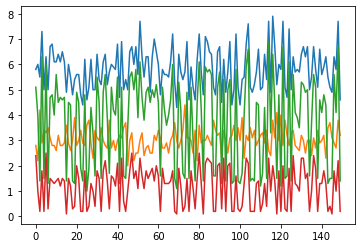

In [88]:
plt.plot(X) # right now there 

In [ ]:
# what do the means look like?


In [90]:
centered_X = ...

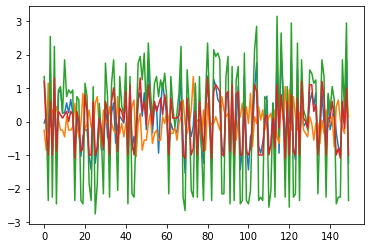

In [91]:
plt.plot(centered_X) # some vary a lot, like the green - and others don't

In [101]:
# how to quantify this spread?

In [99]:
normalized_X = ...

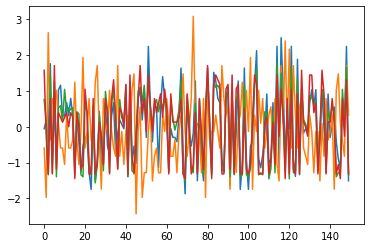

In [100]:
plt.plot(normalized_X) # looks all the same, for better or for worse

Prepared by Mrunali Manjrekar

References: [Statistics and Probability Primer for Computational Biologists](https://ocw.mit.edu/courses/biological-engineering/20-320-analysis-of-biomolecular-and-cellular-systems-fall-2012/modeling-and-manipulating-biomolecular-interactions/MIT20_320F12_Stats_Primer.pdf)